# Project Title: Credit Card Fraud Detection System

#### **1. Introduction**
The Credit Card Fraud Detection System is a machine learning-based project aimed at identifying fraudulent credit card transactions. The dataset used in this project contains credit card transactions, where the majority of transactions are legitimate, and a small fraction are fraudulent. The goal is to build a model that can accurately detect fraudulent transactions to prevent financial losses.

---

#### **2. Dataset Overview**
The dataset used in this project is named `creditcard.csv` and contains the following information:
- **Number of Rows:** 284,807
- **Number of Columns:** 31
- **Columns:**
  - `Time`: The time elapsed between each transaction and the first transaction in the dataset.
  - `V1` to `V28`: Principal components obtained through PCA (due to confidentiality, the original features are not provided).
  - `Amount`: The transaction amount.
  - `Class`: The target variable, where:
    - `0` indicates a legitimate transaction.
    - `1` indicates a fraudulent transaction.

---

#### **3. Data Exploration and Preprocessing**
- **Data Loading:** The dataset was loaded using `pandas.read_csv()`.
- **Data Inspection:**
  - The first three rows of the dataset were displayed to understand its structure.
  - The shape of the dataset was checked, revealing 284,807 rows and 31 columns.
  - Missing values were checked, and no missing values were found in any column.
  - Basic statistical information (mean, standard deviation, min, max, etc.) was calculated using `describe()`.
- **Class Distribution:**
  - The dataset is highly imbalanced:
    - Legitimate transactions (`Class = 0`): 284,315
    - Fraudulent transactions (`Class = 1`): 492
- **Handling Imbalanced Data:**
  - To address the imbalance, a random sample of 492 legitimate transactions was taken to match the number of fraudulent transactions.
  - The final balanced dataset contains 984 rows (492 legitimate + 492 fraudulent).

---

#### **4. Data Visualization**
- **Boxplot Analysis:**
  - A boxplot was generated to visualize the distribution of features. This helped in identifying outliers and understanding the spread of data.

---

#### **5. Model Building**
- **Feature Selection:**
  - The target variable `Class` was separated from the features.
  - Features (`X`) include all columns except `Class`.
  - The target variable (`Y`) is the `Class` column.
- **Train-Test Split:**
  - The dataset was split into training and testing sets using `train_test_split()`:
    - 80% of the data was used for training.
    - 20% of the data was used for testing.
  - The split was stratified to ensure that the class distribution is preserved in both training and testing sets.
- **Model Selection:**
  - A **Logistic Regression** model was chosen for this classification task.
  - The model was trained on the training data using `LogisticRegression()` from `sklearn.linear_model`.

---

#### **6. Model Evaluation**
- **Prediction:**
  - The trained model was used to predict the labels for the test set.
- **Accuracy Calculation:**
  - The accuracy of the model was calculated using `accuracy_score()` from `sklearn.metrics`.
  - The model achieved an accuracy of **93.91%**.

---

#### **7. Conclusion**
- The Credit Card Fraud Detection System successfully identified fraudulent transactions with a high accuracy of 93.91%.
- The model was trained on a balanced dataset to address the issue of class imbalance.
- Logistic Regression proved to be an effective algorithm for this binary classification problem.

---

#### **8. Future Work**
- **Feature Engineering:** Explore additional feature engineering techniques to improve model performance.
- **Advanced Models:** Experiment with more advanced machine learning models such as Random Forest, Gradient Boosting, or Neural Networks.
- **Real-Time Detection:** Implement the model in a real-time system to detect fraudulent transactions as they occur.
- **Hyperparameter Tuning:** Perform hyperparameter tuning to optimize the model's performance.

---

#### **9. Tools and Libraries Used**
- **Python Libraries:**
  - `numpy`: For numerical computations.
  - `pandas`: For data manipulation and analysis.
  - `matplotlib` and `seaborn`: For data visualization.
  - `scikit-learn`: For machine learning model building and evaluation.
- **Machine Learning Algorithm:**
  - Logistic Regression.

---

#### **10. References**
- The dataset used in this project is publicly available and commonly used for fraud detection tasks.
- Documentation for `scikit-learn` and other Python libraries was referred to for implementation details.

---

This report summarizes the steps taken to build a Credit Card Fraud Detection System, from data exploration to model evaluation. The project demonstrates the effectiveness of machine learning in identifying fraudulent transactions, which is crucial for financial institutions and consumers alike.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
# Data Importing
data = pd.read_csv(r'E:\Data Set\csv file\creditcard.csv')

In [7]:
data.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


# Gathering Besic Information About Data

In [9]:
data.shape

(284807, 31)

In [11]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [15]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


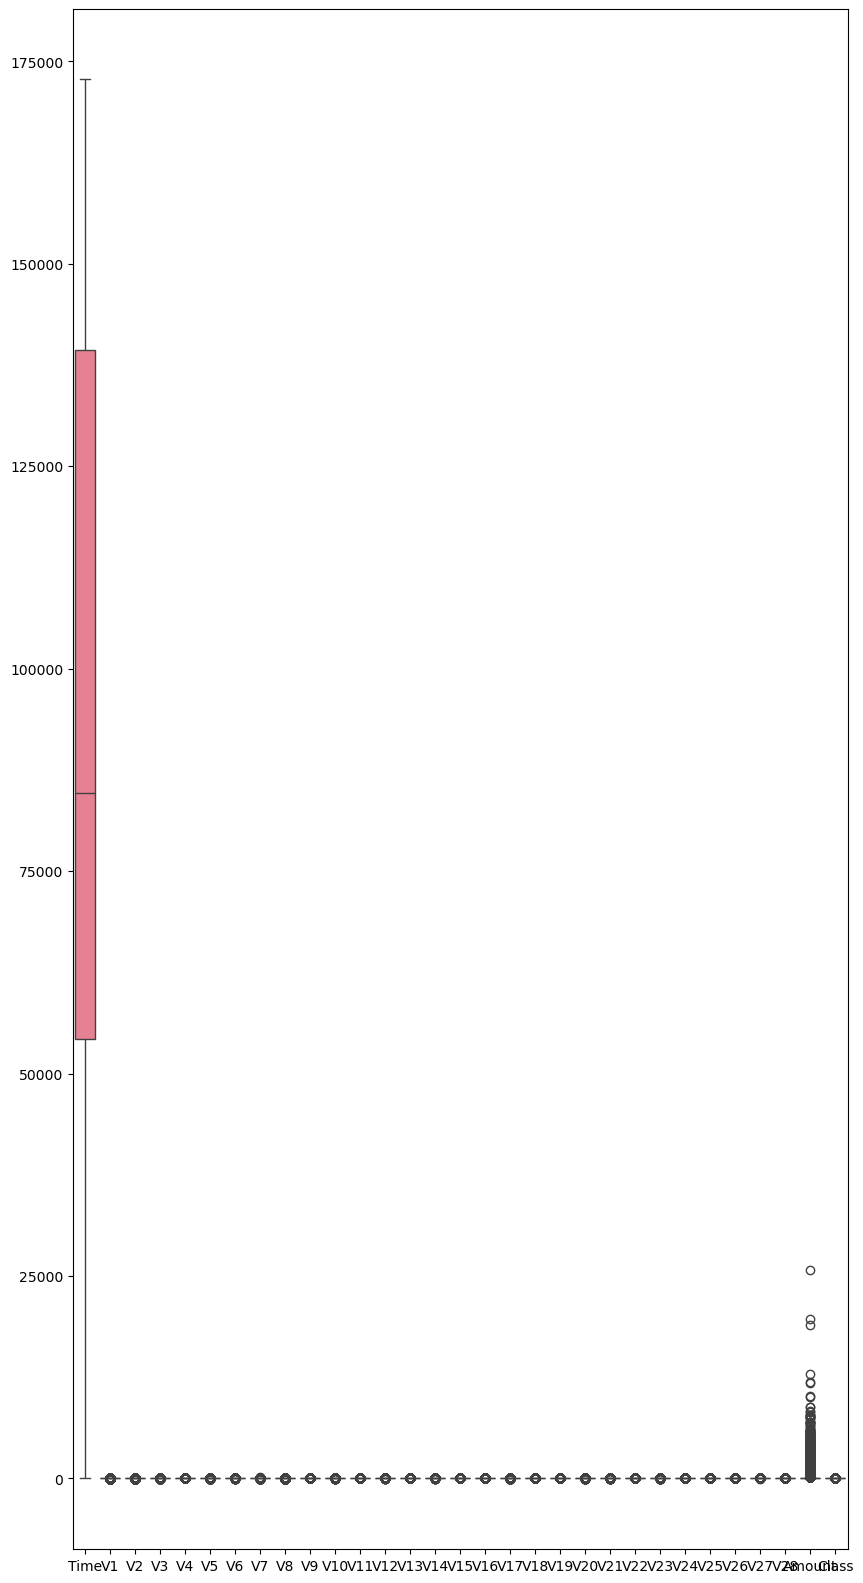

In [27]:
plt.figure(figsize= (10,20))
sns.boxplot(data)
plt.show()

In [104]:
# identify the data is balanced or not
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

### Data is not Balanced

In [29]:
legit = data[data.Class==0]
fraud = data[data['Class']==1]

In [33]:
legit['Class'].value_counts()

Class
0    284315
Name: count, dtype: int64

In [35]:
fraud['Class'].value_counts()

Class
1    492
Name: count, dtype: int64

In [37]:
legit_sample = legit.sample(n=492)
legit_sample.shape

(492, 31)

### Now our Data is balanced 

In [39]:
data = pd.concat([legit_sample, fraud], axis=0)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
186861,127285.0,1.953225,-1.239730,-2.139097,-2.028097,-0.061367,-0.328376,-0.114861,-0.113021,2.622597,...,0.311647,1.169290,-0.475623,-1.295743,0.792817,-0.326966,0.016123,-0.071237,110.66,0
54605,46525.0,1.150753,0.254705,-0.152045,0.793169,0.617004,0.480886,0.221427,0.093345,-0.464481,...,-0.437048,-1.382581,0.058397,-1.220013,0.302406,-0.759957,0.017112,0.012317,46.00,0
46664,42878.0,-0.552143,1.123263,0.625785,0.666874,0.023816,-0.112026,0.286371,0.531505,-0.813246,...,0.196357,0.357119,-0.158725,-0.384913,-0.219447,-0.302698,0.028853,0.082495,21.93,0
216472,140489.0,1.864426,-0.609929,-0.301985,0.292221,-0.861368,-0.641847,-0.470895,-0.154273,1.349523,...,0.232787,0.830777,0.065907,0.122855,-0.159623,0.111916,0.010610,-0.027825,74.95,0
241438,151025.0,1.306081,-1.590286,0.903630,2.632334,-1.724731,1.058194,-1.208346,0.330428,1.199436,...,0.185928,0.389722,0.043217,0.158090,-0.897010,2.297423,-0.128889,-0.002620,289.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [41]:
data.shape

(984, 31)

In [49]:
data["Class"].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [55]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95870.922764,0.066438,0.075715,-0.034714,-0.020741,-0.114299,-0.036902,-0.069380,0.102824,0.011454,...,-0.005999,-0.012158,-0.004549,-0.040082,-0.014044,0.003257,-0.023797,-0.003976,-0.001822,74.591423
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [67]:
X = data.drop('Class', axis=1)
Y  =data[['Class']]

In [63]:
X.shape

(984, 30)

In [69]:
Y.shape

(984, 1)

In [71]:
from sklearn.model_selection import train_test_split

In [73]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, stratify = Y, random_state = 2)

In [77]:
from sklearn.linear_model import LogisticRegression

In [79]:
model = LogisticRegression()

In [81]:
model.fit(x_train, y_train)

C:\Users\thesr\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thesr\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [89]:
y_pred = model.predict(x_test)

In [95]:
from sklearn.metrics import accuracy_score

In [99]:
accuracy_score(y_pred, y_test)

0.9390862944162437